In [26]:
import csv
import numpy as np
import os
import cv2
csv_file = input('Enter the name of your input file: ')
txt_file = input('Enter the name of your output file: ')
with open(txt_file, "w") as my_output_file:
    with open(csv_file, "r") as my_input_file:
        [ my_output_file.write(" ".join(row)+'\n') for row in csv.reader(my_input_file)]
    my_output_file.close()

Enter the name of your input file: testing.csv
Enter the name of your output file: testing.txt


In [28]:
txt = open('./testing.txt','r')
txt2 = open('./training.txt','r')
f = open('./test2.txt','w')

while True : 
    line = txt.readline().split()
    if not line: 
        break 
    f.write('/home/piai/Yolo_mark/x64/Release/data/images/%s\n'%(line[1]))
    
while True : 
    line = txt2.readline().split()
    if not line: 
        break 
    f.write('/home/piai/Yolo_mark/x64/Release/data/images/%s\n'%(line[1]))
    
txt.close()
txt2.close()
f.close()


In [37]:
txt = open('./testing.txt','r')
txt2 = open('./training.txt','r')

while True : 
    line = txt.readline().split()
    
    if not line: 
        break 
    
    line2 = line[1].split('.')
    f_name = './images/'+line2[0]+'.txt'
    i_name = './images/'+line2[0]+'.'+line2[1]
    f = open(f_name, 'w')
    img = cv2.imread(i_name)
    row,col,ch= img.shape
    
    X = col
    Y = row
    
#     print(X,Y)
    for i in range(int(line[5])):
        j = 5 + (4*i)
        xmin = float(line[j+1])
        xmax = float(line[j+2])
        ymin = float(line[j+3])
        ymax = float(line[j+4])
        
#         print(xmin, xmax, ymin, ymax)
        
        x_center = ((xmin + xmax)/2)/X
        y_center = ((ymin + ymax)/2)/Y
        width = abs(xmax - xmin)/X
        height = abs(ymax - ymin)/Y
        
#         print(x_center, y_center, width, height)
        
#         f.write('0')
#         f.write(' %.6f' %(x_center))
#         f.write(' %.6f' %(y_center))
#         f.write(' %.6f' %(width))
#         f.write(' %.6f' %(height))
    
        f.write('0 %.6f %.6f %.6f %.6f\n' %(x_center, y_center, width, height))
    f.close()
    
while True : 
    line = txt2.readline().split()
    
    if not line: 
        break 
    
    line2 = line[1].split('.')
    f_name = './images/'+line2[0]+'.txt'
    i_name = './images/'+line2[0]+'.'+line2[1]
    f = open(f_name, 'w')
    img = cv2.imread(i_name)
    row,col,ch= img.shape
    
    X = col
    Y = row
    
#     print(line[5])
    for i in range(int(line[5])):
        j = 5 + (4*i)
        xmin = float(line[j+1])
        xmax = float(line[j+2])
        ymin = float(line[j+3])
        ymax = float(line[j+4])
        
        x_center = ((xmin + xmax)/2)/X
        y_center = ((ymin + ymax)/2)/Y
        width = abs(xmax - xmin)/X
        height = abs(ymax - ymin)/Y
        
#         f.write('0')
#         f.write(' %.6f' %(x_center))
#         f.write(' %.6f' %(y_center))
#         f.write(' %.6f' %(width))
#         f.write(' %.6f' %(height))
        
        f.write('0 %.6f %.6f %.6f %.6f\n' %(x_center, y_center, width, height))
    f.close()

txt.close()
txt2.close()

In [11]:
f = open('./train.txt','r')
f2 = open('./images.txt','w')

while True : 
    line = f.readline()
    if not line: 
        break 
#     print(line[4])
    
    line = line.rstrip().split('/')
    f2.write('/home/piai/Yolo_mark/x64/Release/data/images/%s\n'%(line[4]))
    
f.close()
f2.close()

In [ ]:
import cv2
import numpy as np 
def make_noise(std, gray): 
    height, width = gray.shape
    img_noise = np.zeros((height, width), dtype=np.float) 
    for i in range(height): 
        for a in range(width):
            make_noise = np.random.normal() # 랜덤함수를 이용하여 노이즈 적용
            set_noise = std * make_noise 
            img_noise[i][a] = gray[i][a] + set_noise 
    return img_noise 

def run():
    img = cv2.imread('./img/0.jpg') 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    height, width = gray.shape 
    
    std = 15 
    img_noise = make_noise(std, gray)
    img_noise2 = make_noise(std, gray)
    img_noise3 = make_noise(std, gray) 
    img_noise4 = make_noise(std, gray) 
    
    out2 = np.zeros((height, width), dtype=np.float) 
    out3 = np.zeros((height, width), dtype=np.float) 
    out4 = np.zeros((height, width), dtype=np.float) 
    
    # 평균 계산 
    for i in range(height):
        for j in range(width):
            if (img_noise[i][j] + img_noise2[i][j]) / 2 > 255:
                out2[i][j] = 255 
            else: 
                out2[i][j] = (img_noise[i][j] + img_noise2[i][j]) / 2 
            if (img_noise[i][j] + img_noise2[i][j] + img_noise3[i][j]) / 3 > 255: 
                out3[i][j] = 255 
            else: 
                out3[i][j] = (img_noise[i][j] + img_noise2[i][j] + img_noise3[i][j]) / 3
            if (img_noise[i][j] + img_noise2[i][j] + img_noise3[i][j] + img_noise4[i][j]) / 4 > 255: 
                out4[i][j] = 255 
            else: 
                out4[i][j] = (img_noise[i][j] + img_noise2[i][j] + img_noise3[i][j] + img_noise4[i][j]) / 4 
                
    cv2.imshow("original", gray) 
    cv2.imshow('noise', img_noise.astype(np.uint8)) 
    cv2.imshow('avr2', out2.astype(np.uint8)) 
    cv2.imshow('avr3', out3.astype(np.uint8)) 
    cv2.imshow('avr4', out4.astype(np.uint8)) 
    cv2.waitKey(0) 
run()


In [ ]:
#gray

In [2]:
import numpy as np
import cv2
from random import random
import copy

img_path = './img/0.jpg'

In [7]:
def salt_and_pepper(image,p):
    output = np.zeros(image.shape, np.uint8)
    thres = 1- p
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random()
            if rdn < p:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

In [11]:
img = cv2.imread(img_path,2)
origin = copy.deepcopy(img)
img = salt_and_pepper(img, 0.2)

cv2.imwrite('img/12.jpg', img)

True

In [ ]:
#

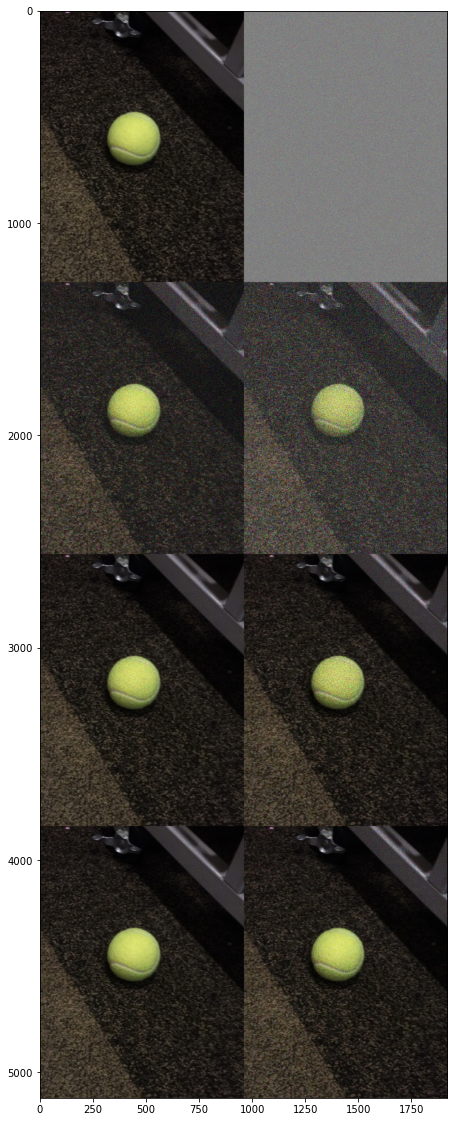

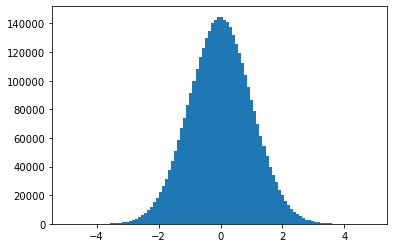

True

In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./img/0.jpg')[...,::-1]/255.0
noise =  np.random.normal(loc=0, scale=1, size=img.shape)

# noise overlaid over image
noisy = np.clip((img + noise*0.2),0,1)
noisy2 = np.clip((img + noise*0.4),0,1)

# noise multiplied by image:
# # whites can go to black but blacks cannot go to white
noisy2mul = np.clip((img*(1 + noise*0.2)),0,1)
noisy4mul = np.clip((img*(1 + noise*0.4)),0,1)

noisy2mul = np.clip((img*(1 + noise*0.2)),0,1)
noisy4mul = np.clip((img*(1 + noise*0.4)),0,1)

# noise multiplied by bottom and top half images,
# whites stay white blacks black, noise is added to center
# img2 = img*2
n2 = np.clip(np.where(img2 <= 1, (img2*(1 + noise*0.2)), (1-img2+1)*(1 + noise*0.2)*-1 + 2)/2, 0,1)
n4 = np.clip(np.where(img2 <= 1, (img2*(1 + noise*0.4)), (1-img2+1)*(1 + noise*0.4)*-1 + 2)/2, 0,1)


# norm noise for viz only
noise2 = (noise - noise.min())/(noise.max()-noise.min())
plt.figure(figsize=(20,20))
plt.imshow(np.vstack((np.hstack((img, noise2)),
                      np.hstack((noisy, noisy2)),
                      np.hstack((noisy2mul, noisy4mul)),
                      np.hstack((n2, n4)))))
plt.show()
plt.hist(noise.ravel(), bins=100)
plt.show()
cv2.imwrite('img/12.jpg', noise2)

In [24]:
import numpy as np
import os
import cv2

image = cv2.imread('./img/0.jpg')

def noisy(noise_typ,image):
    if noise_typ == "gauss":
      row,col,ch= image.shape
      mean = 0
      var = 0.1
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col,ch))
      gauss = gauss.reshape(row,col,ch)
      noisy = image + gauss
      return noisy
    elif noise_typ == "s&p":
      row,col,ch = image.shape
      s_vs_p = 0.5
      amount = 0.004
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 1

      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out
    elif noise_typ == "poisson":
      vals = len(np.unique(image))
      vals = 2 ** np.ceil(np.log2(vals))
      noisy = np.random.poisson(image * vals) / float(vals)
      return noisy
    elif noise_typ =="speckle":
      row,col,ch = image.shape
      gauss = np.random.randn(row,col,ch)
      gauss = gauss.reshape(row,col,ch)        
      noisy = image + image * gauss
      return noisy

cv2.imwrite('img/12.jpg', noisy("speckle", image))

True